In [75]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import uproot
import pandas as pd

In [76]:
data_ = uproot.open("outfile-ttbar-10.root")["ntuples"]["tree"]
data_.keys()

['nevent',
 'nlumi',
 'nrun',
 'trackEta',
 'trackPhi',
 'qoverp',
 'dxy',
 'dsz',
 'trackTPIdx',
 'trackEtaError',
 'trackPhiError',
 'qoverpError',
 'dxyError',
 'dszError',
 'trackParameters',
 'covarianceArray',
 'stereoHitX',
 'stereoHitY',
 'stereoHitZ',
 'stereoHitR',
 'stereoHitPhi',
 'stereoHitEta',
 'stereoHitLayer',
 'stereoTPIndex',
 'stereoHitMatch',
 'monoHitX',
 'monoHitY',
 'monoHitZ',
 'monoHitR',
 'monoHitPhi',
 'monoHitEta',
 'monoHitLayer',
 'monoTPIndex',
 'monoHitMatch']

In [77]:
from mpl_toolkits.mplot3d import Axes3D

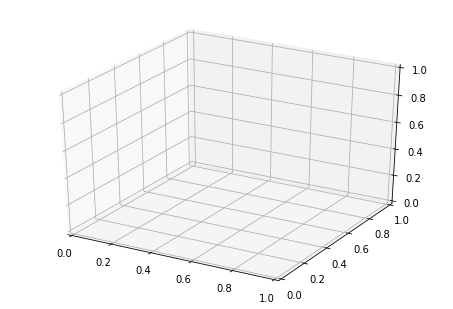

In [78]:
fig_ = plt.figure()
ax_ = Axes3D(fig_)

In [79]:
# Find Number of Events based on any property length
track_eta_ = data_.array("trackEta")
print "Number of Events: ", len(track_eta_)

Number of Events:  10


Iterating over trackEta


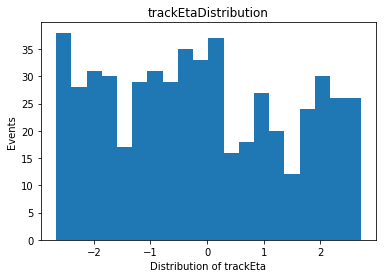

Iterating over trackPhi


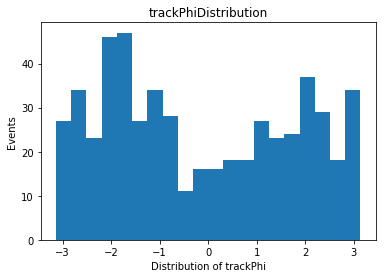

Iterating over qoverp


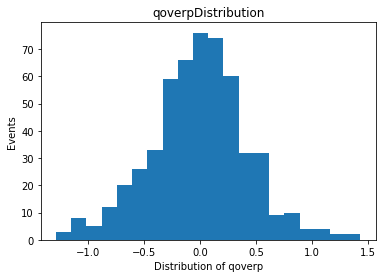

Iterating over dxy


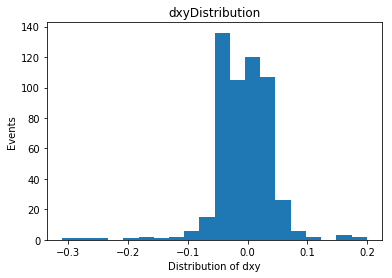

Iterating over dsz


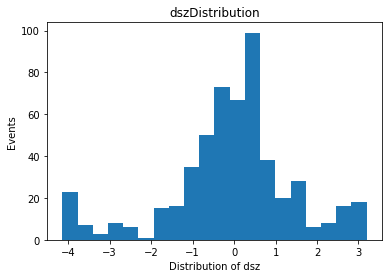

In [80]:
'''
track_properties_ = []
for key in data_.keys():
    if key == 'trackParameters' or key == 'covarianceArray' or 'Hit' in key or 'n' in key or 'Error' in key:
        continue
    else:
        track_properties_.append(key)
'''

for i, key in zip(range(5), ["trackEta", "trackPhi", "qoverp", "dxy", "dsz"]):
    track_param_ = data_.array(key)

    print "Iterating over", key
    concat_track_param_ = []
    for j in range(len(track_param_)):
        concat_track_param_.extend(track_param_[j])
    plt.clf()
    ax_ = plt.subplot()
    ax_.hist(concat_track_param_, histtype='bar', bins=20, align='mid', orientation='vertical')
    plt.ylabel('Events')
    plt.xlabel('Distribution of ' + key)
    plt.title(key + 'Distribution')
    plt.savefig('plots/track/' + key)
    plt.show()

In [81]:
plt.clf()

<Figure size 432x288 with 0 Axes>

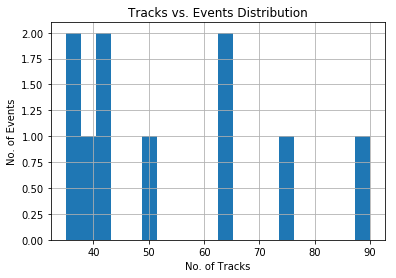

In [135]:
# Plot the distribution of tracks over events 
# using the length of any paramater array - e.g. track eta

track_Eta_ = data_.array("trackEta")
concat_num_tracks_ = []

for i in range(len(track_Eta_)):
     concat_num_tracks_.append(len(track_Eta_[i]))

ax_ = plt.subplot()
ax_.hist(concat_num_tracks_, histtype='bar', bins=20, align='mid', orientation='vertical')

plt.xlabel('No. of Tracks')
plt.ylabel('No. of Events')
plt.title('Tracks vs. Events Distribution')
plt.grid(True)

plt.show()

49588


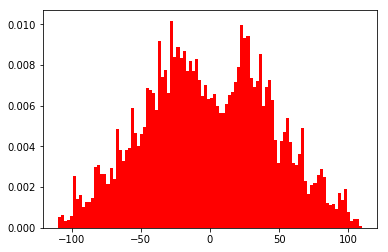

In [83]:
# This plot is just reflecting how root plots the distribution of Rechits along a single axis (X)
mono_x_ = data_.array('monoHitX')
plt.clf()
ax_ = plt.subplot()

mono_rechit_length_ = []

# assumes length of mono_x_ mono_y_ and mono_z_ is the same
for i in range(len(mono_x_)):
        mono_rechit_length_.extend(mono_x_[i])
        
print len(mono_rechit_length_)

ax_.hist(mono_rechit_length_, bins=100, histtype='stepfilled', align='mid', orientation='vertical', color='r', density=True)
plt.show()

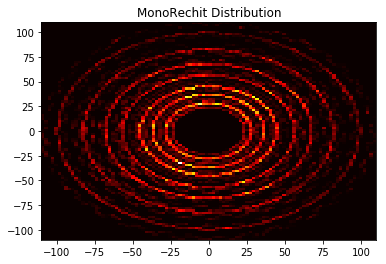

In [84]:
# ToDo: Add lognorm colormap

mono_x_ = data_.array("monoHitX") 
mono_y_ = data_.array("monoHitY")
mono_z_ = data_.array("monoHitZ")

 

if len(mono_x_) == len(mono_y_):
    concat_mono_x_ = []
    concat_mono_y_ = []

    for i in range(len(mono_x_)):
        concat_mono_x_.extend(mono_x_[i])
        concat_mono_y_.extend(mono_y_[i])

plt.clf()
ax_ = plt.subplot()
# Plot the 2D Histogram for Mono Rechits
ax_.set_title('MonoRechit Distribution')
ax_.hist2d(concat_mono_x_, concat_mono_y_, bins=100, normed=True, cmap='hot')
plt.show()

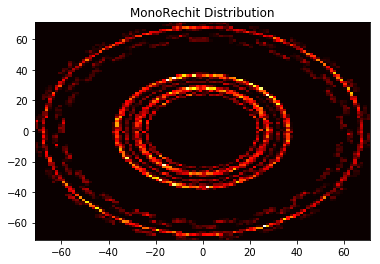

In [85]:
# ToDo: Add lognorm colormap

stereo_x_ = data_.array("stereoHitX") 
stereo_y_ = data_.array("stereoHitY")
stereo_z_ = data_.array("stereoHitZ")

 

if len(mono_x_) == len(mono_y_):
    concat_stereo_x_ = []
    concat_stereo_y_ = []

    for i in range(len(mono_x_)):
        concat_stereo_x_.extend(stereo_x_[i])
        concat_stereo_y_.extend(stereo_y_[i])

plt.clf()
ax_ = plt.subplot()
# Plot the 2D Histogram for Mono Rechits
ax_.set_title('MonoRechit Distribution')
ax_.hist2d(concat_stereo_x_, concat_stereo_y_, bins=100, normed=True, cmap='hot')
plt.show()

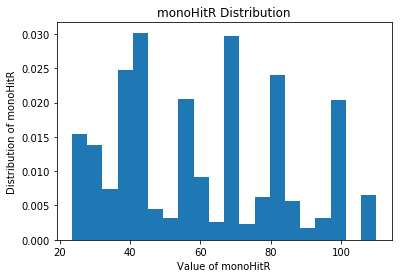

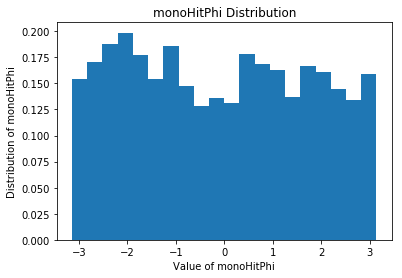

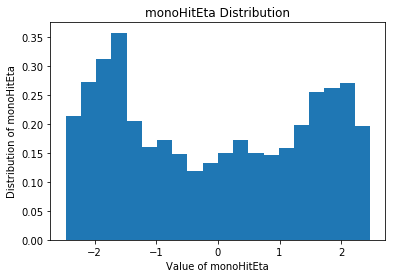

In [86]:
# Define a loop that plots R, Phi, and Eta for Mono Hits

for param in ["monoHitR", "monoHitPhi", "monoHitEta"]:
    mono_param_ = data_.array(param)
    concat_mono_param_ = []
    
    for i in range(len(mono_param_)):
            concat_mono_param_.extend(mono_param_[i])

    plt.clf()
    ax_ = plt.subplot()
    # Plot the 2D Histogram for Mono Rechits
    ax_.set_title('MonoRechit Distribution of ' + param)
    ax_.hist(concat_mono_param_, bins=20, histtype='stepfilled', align='mid', orientation='vertical', density=True)
    plt.xlabel('Value of ' + param)
    plt.ylabel('Distribution of ' + param)
    plt.title(param + ' Distribution')
    plt.savefig('plots/mono/' + param)
    plt.show()

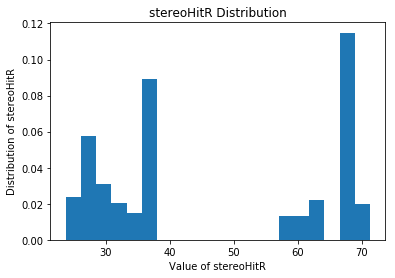

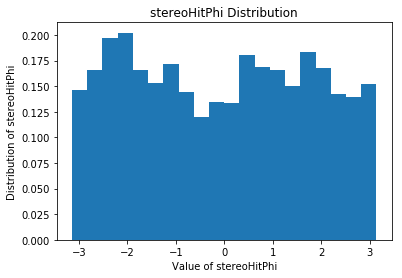

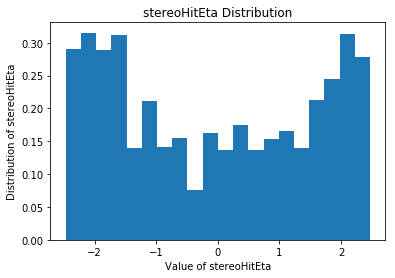

In [87]:
# Define a loop that plots R, Phi, and Eta for Stereo Hits

for param in ["stereoHitR", "stereoHitPhi", "stereoHitEta"]:
    mono_param_ = data_.array(param)
    concat_mono_param_ = []
    
    for i in range(len(mono_param_)):
            concat_mono_param_.extend(mono_param_[i])

    plt.clf()
    ax_ = plt.subplot()
    # Plot the 2D Histogram for Mono Rechits
    ax_.set_title('MonoRechit Distribution of ' + param)
    ax_.hist(concat_mono_param_, bins=20, histtype='stepfilled', align='mid', orientation='vertical', density=True)
    plt.xlabel('Value of ' + param)
    plt.ylabel('Distribution of ' + param)
    plt.title(param + ' Distribution')
    plt.savefig('plots/mono/' + param)
    plt.show()

In [134]:
stereo_tp_idx_ = data_.array('stereoTPIndex')
track_tp_idx_ = data_.array('trackTPIdx')
matched_hits_ = 0
matched_stereo_rechit_ = data_.array('stereoHitMatch')
matched_tracks_ = 0

# This should not be required with the availability of "matched hit" 
# Iterate over all events and track indices to find a match for rechits
for j in range(len(stereo_tp_idx_)):
    # Print the number of points in each event
    # print len(stereo_tp_idx_[j]), "hits from", len(set(stereo_tp_idx_[j])), "tracking particles"
    unique_tracks_matched_per_event_ = 0
    
    for i in list(set(stereo_tp_idx_[j])):
        if i in track_tp_idx_[j]:
            unique_tracks_matched_per_event_+=1
    
    # Count the entries with hit match value = 1
    # Use this to corroborate that you're counting the right hits
    hit_match_count_ = np.bincount(matched_stereo_rechit_[j])
    
    # The above statement returns an array with count of 0's and 1's
    # we need only the 1's
    print hit_match_count_[1], "/",  len(stereo_tp_idx_[j]), "hits matched to", 
    
    print unique_tracks_matched_per_event_,"/", len(track_tp_idx_[j]),"tracks"
    matched_tracks_ += unique_tracks_matched_per_event_
    matched_hits_ += hit_match_count_[1]

total_hits_ = sum([len(hits) for hits in stereo_tp_idx_])
total_tracks_ = sum([len(tracks) for tracks in track_tp_idx_])
# Summary
print "\n", matched_hits_, "/", total_hits_, "hits matched to", matched_tracks_, "/", total_tracks_, "tracks"

179 / 2142 hits matched to 29 / 37 tracks
162 / 2071 hits matched to 34 / 42 tracks
254 / 2054 hits matched to 57 / 64 tracks
363 / 3375 hits matched to 73 / 90 tracks
198 / 1877 hits matched to 45 / 49 tracks
316 / 2766 hits matched to 60 / 65 tracks
195 / 2151 hits matched to 35 / 35 tracks
163 / 1835 hits matched to 32 / 42 tracks
219 / 2165 hits matched to 48 / 75 tracks
141 / 1327 hits matched to 31 / 38 tracks

2190 / 21763 hits matched to 444 / 537 tracks


In [89]:
type(track_tp_idx_)

awkward.array.jagged.JaggedArray

In [90]:
from itertools import chain, product

In [91]:
# Check that the arrays are of equal lengths - i.e. each point has an index and an x, y, z coordinate
for i in range(len(stereo_tp_idx_)):
    #print len(stereo_tp_idx_[i]), len(stereo_x_[i])
    if len(stereo_tp_idx_[i]) != len(stereo_x_[i]) or len(stereo_tp_idx_[i]) != len(stereo_y_[i]) or len(stereo_tp_idx_[i]) != len(stereo_z_[i]):
        print "Length does not match"
        if len(stereo_tp_idx_[i]) > len(stereo_x_[i]):
            print "There are missing x, y, z coordinates"
        else:
            print "There are undefined cluster indices for these points"
            

In [92]:
total_tracks_ = sum([len(track) for track in track_tp_idx_])
print "Total tracks: ", total_tracks_

Total tracks:  537


In [172]:
# define a unique track index
track_index_ = 0
x_counter_ = 0
rechit_track_map_ = {}

track_event_map_ = {}

for event in range(len(stereo_tp_idx_)):
    
    # Check if for that event that hit has a value of matched = 1
    for hitIndex in range(len(matched_stereo_rechit_[event])):
        
        if matched_stereo_rechit_[event][hitIndex] == 1:
            if stereo_tp_idx_[event][hitIndex] == -1:
                continue
            x_counter_+=1
            # This means that hit has been matched to a track
            # Now associate a unique ID to that track index and
            # add that row into the rechit map
            unique_id_ = (event, stereo_tp_idx_[event][hitIndex])
            
            # Store the rechit properties on a per-track basis in a map
            # corresponding to one single track ID per list of rechit properties
            if unique_id_ in track_event_map_:
                # This means there is already a list at that value
                # You can add r, phi, eta, and whatever we need to store
                rechit_track_map_[track_event_map_[unique_id_]].append(
                    [stereo_x_[event][hitIndex], stereo_y_[event][hitIndex], stereo_z_[event][hitIndex]])
            else:
                # This means we need to create a list at that value
                track_event_map_[unique_id_] = track_index_
                track_index_ += 1
                # You can add r, phi, eta, and whatever we need to store
                rechit_track_map_[track_event_map_[unique_id_]] = []
                rechit_track_map_[track_event_map_[unique_id_]].append([stereo_x_[event][hitIndex], stereo_y_[event][hitIndex], stereo_z_[event][hitIndex]])
        
    

In [168]:
print track_index_
print (x_counter_)

1098
1825


In [169]:
#for key in sorted(track_event_map_):
#    print key, track_event_map_[key]    
print len(track_event_map_.keys())

1098


In [173]:
print rechit_track_map_

{0: [[21.230358, 10.660396, -44.980198], [18.634892, 31.588293, -107.312614]], 1: [[20.301825, 13.079406, -3.614967], [59.690994, 5.661095, -27.308685]], 2: [[19.974228, 13.423305, -24.236673], [24.163357, 12.509825, -15.895227], [25.453316, -9.660059, -39.355614]], 3: [[20.039883, 13.354248, -44.692493], [22.050156, 15.119261, -39.69746]], 4: [[18.096722, 15.393954, -44.975155], [29.987192, 13.088081, -59.934776]], 5: [[14.158143, -23.532055, -60.304413], [16.514944, -28.034954, -18.094603], [20.180403, -20.351566, -80.27929], [25.791811, -13.001468, -103.81286]], 6: [[23.293755, -13.685791, -15.999935], [29.922596, -11.574142, -17.723145], [31.06695, -9.794492, -59.86179]], 7: [[22.663736, -15.326763, -60.349777], [26.332483, -18.665031, -59.666294]], 8: [[23.539701, -13.044762, -60.595013], [25.621119, -13.238354, -77.9144], [31.444498, -18.833954, -81.41433]], 9: [[25.276894, -10.77475, -15.773038], [29.526861, -12.831552, -17.855413]], 10: [[26.940426, -4.8282003, -60.3454], [31.2